In [312]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle

from sklearn.model_selection import GridSearchCV,train_test_split,StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier

# 1. Khám phá dữ liệu

In [313]:
data = pd.read_csv("Data/Sleep_health_and_lifestyle_dataset.csv")
#Đọc 5 bản đầu dữ liệu 
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## Mô tả tập dữ liệu 

Bộ dữ liệu này chứng thông tin liên quan đến sức khỏe , hoạt động thể chất , giấc ngủ và các yếu tố của từng cá nhân. Dữ liệu có thể được sử dụng để phân tích các yếu tố ảnh hưởng đến giấc ngủ hoặc để dự đoán liên quan đến rối loạn giấc ngủ.

------------------------------------------

**Các thuộc tính:**
- Person ID: Mã định danh duy nhất cho từng cá nhân. | Dữ liệu định danh (Categorical).
- Gender: Giới tính của cá nhân. | Dữ liệu phân loại (Categorical) | "Male", "Female".
- Age: Tuổi của cá nhân (tính bằng năm). | Dữ liệu số liên tục (Numerical).
- Occupation: Nghề nghiệp hoặc công việc của cá nhân. | Dữ liệu phân loại (Categorical).
- Sleep Duration (hours): Số giờ ngủ trung bình mỗi ngày của cá nhân. | Dữ liệu số liên tục (Numerical).
- Quality of Sleep (scale: 1-10): Đánh giá chất lượng giấc ngủ trên thang điểm từ 1 (tệ nhất) đến 10 (tốt nhất). | Dữ liệu số rời rạc (Ordinal).
- Physical Activity Level (minutes/day): Số phút hoạt động thể chất mỗi ngày của cá nhân. | Dữ liệu số liên tục (Numerical).
- Stress Level (scale: 1-10): Đánh giá mức độ căng thẳng trên thang điểm từ 1 (ít nhất) đến 10 (cao nhất). | Dữ liệu số rời rạc (Ordinal).
- BMI Category: Phân loại chỉ số khối cơ thể của cá nhân. | Dữ liệu phân loại (Categorical) | "Underweight", "Normal", "Overweight", "Obese".
- Blood Pressure (systolic/diastolic): Huyết áp của cá nhân, được ghi dưới dạng áp suất tâm thu / áp suất tâm trương. | Dữ liệu số dạng cặp giá trị (Numerical).
- Heart Rate (bpm): Nhịp tim nghỉ ngơi của cá nhân (beats per minute). | Dữ liệu số liên tục (Numerical).
- Daily Steps: Số bước đi trung bình mỗi ngày của cá nhân. | Dữ liệu số liên tục (Numerical).
- Sleep Disorder: Tình trạng rối loạn giấc ngủ của cá nhân. | Dữ liệu phân loại (Categorical) | "None", "Insomnia", "Sleep Apnea".

In [314]:
#Tính toán thống kê cho các cột số DF 
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [315]:
#Tính toán thống kê cho các cột danh mục 
data.describe(include='O')

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,155
unique,2,11,4,25,2
top,Male,Nurse,Normal,130/85,Sleep Apnea
freq,189,73,195,99,78


# 2 Xử lý dữ liệu 

## 2.1 Xử lý dữ liệu trùng lặp 

In [316]:
data.duplicated().sum()

0

## 2.2 Kiểm tra lỗi cấu trúc 

In [317]:
#Tổng quan dataframe 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [318]:
data['Gender'] = data['Gender'].astype(str)

In [319]:
data['Sleep Disorder'].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

In [320]:
data['Sleep Disorder'] = data['Sleep Disorder'].fillna('No Disorder')

In [321]:
data['Sleep Disorder'].value_counts()

Sleep Disorder
No Disorder    219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

## 2.3 Kiểm tra missing 

In [322]:
data.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

Nhận xét : Không có dữ liệu nào bị thiếu

## 2.4 Xử lý ngoại lệ 

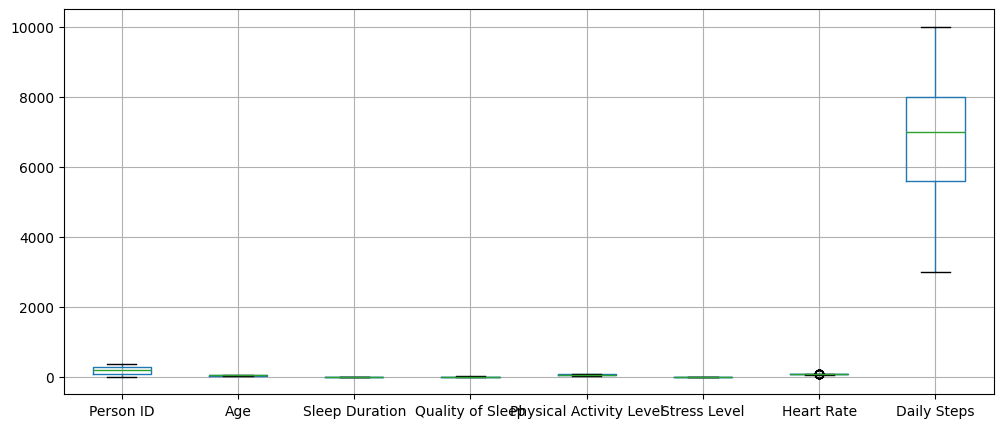

In [324]:
plt.figure(figsize=(12,5))
data.boxplot()
plt.show()

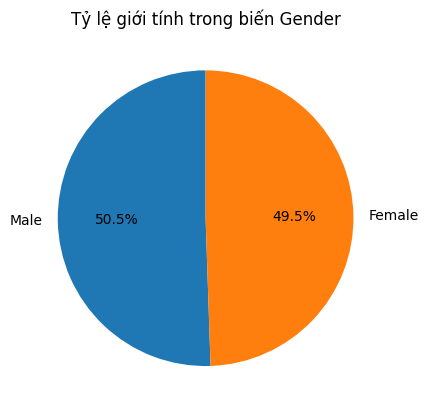

In [276]:
data['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Tỷ lệ giới tính trong biến Gender')
plt.ylabel('')  # Ẩn nhãn trục Y
plt.show()

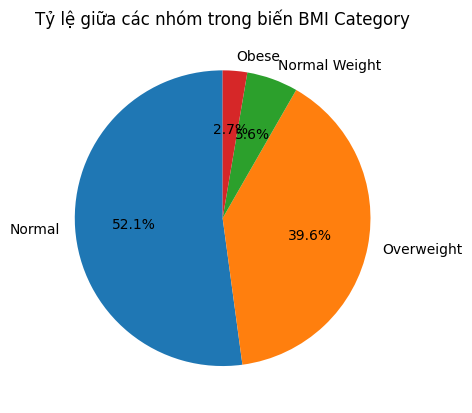

In [277]:
data['BMI Category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Tỷ lệ giữa các nhóm trong biến BMI Category')
plt.ylabel('') 
plt.show()

In [278]:
data['BMI Category'] = data['BMI Category'].replace('Normal Weight','Underweight')

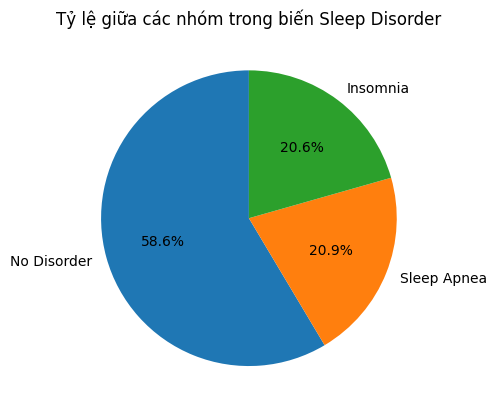

In [279]:
data['Sleep Disorder'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Tỷ lệ giữa các nhóm trong biến Sleep Disorder')
plt.ylabel('')  
plt.show()

# 3. Phân tích tương quan

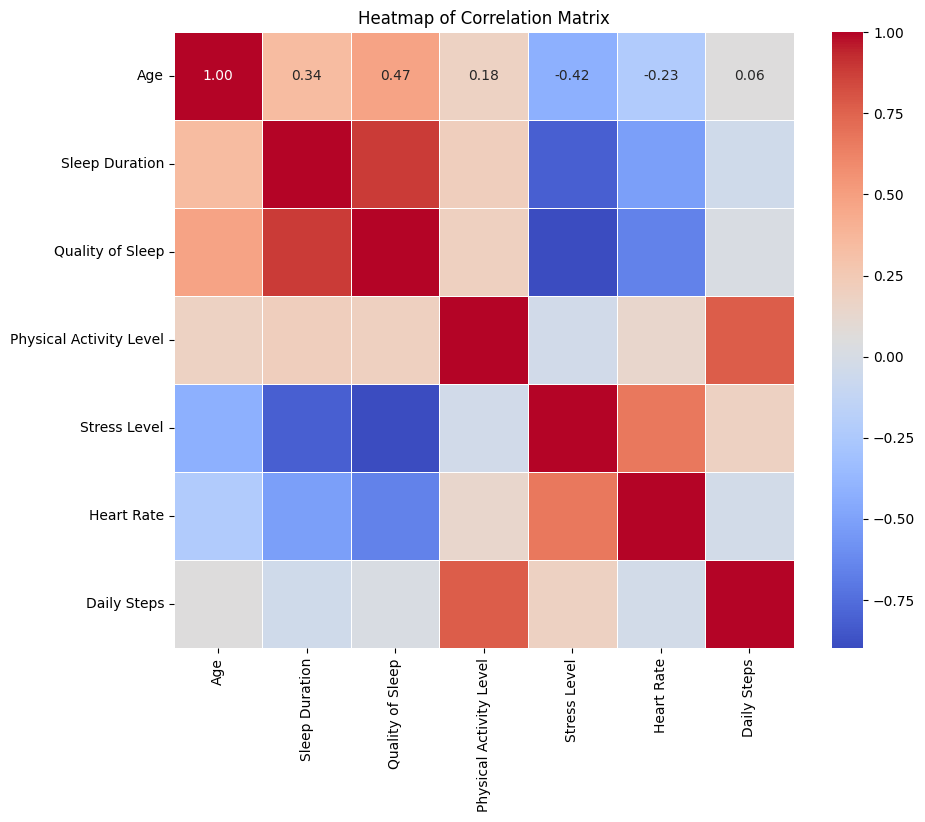

                   level_0                  level_1         0
0           Sleep Duration         Quality of Sleep  0.883213
1           Sleep Duration             Stress Level -0.811023
2         Quality of Sleep           Sleep Duration  0.883213
3         Quality of Sleep             Stress Level -0.898752
4  Physical Activity Level              Daily Steps  0.772723
5             Stress Level           Sleep Duration -0.811023
6             Stress Level         Quality of Sleep -0.898752
7              Daily Steps  Physical Activity Level  0.772723


In [280]:
# Chỉ chọn các cột số để tính toán tương quan
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns.drop('Person ID')
correlation_matrix = data[numerical_columns].corr()

# Vẽ Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()
high_corr = correlation_matrix[(abs(correlation_matrix) >= 0.7) & (abs(correlation_matrix) < 1)]
high_corr_pairs = high_corr.stack().reset_index()
print(high_corr_pairs)

*Nhận xét*: + Sleep Duration - Quality of Sleep , Physical Activity Level - Daily Steps : Tương quan dương 
            + Sleep Duration - Stress Level , Quality of Sleep - Stress Level : Tương quan âm 

-----------------------------

Đề xuất loại cột : Daily Steps - Lý do : Physical Activity Level thể hiện thời gian thể dục của một cá nhân - tức sức khỏe , việc vận động càng nhiều thì nghĩa là học sẽ có đi lại nhiều 

-------------------------------

Đề xuất loại cột Quality of Sleep - Lý do : Một người ngủ ít nhưng lại đánh giá giấc ngủ của bản thân là bình thường - tức đây là một đánh giá khách quan , chỉ có giá trị tham khảo , không thể biết thật sự người đó có chất lượng ngủ tốt hay không 

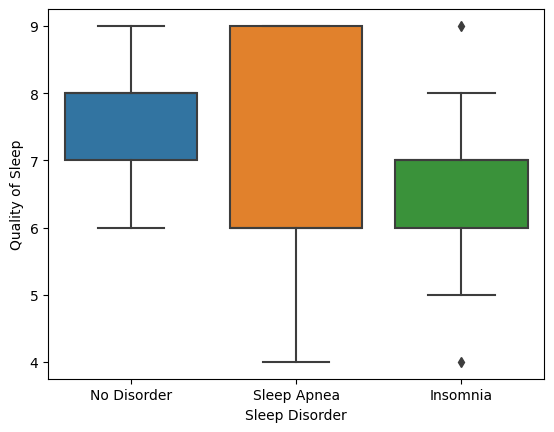

In [325]:
sns.boxplot(x='Sleep Disorder', y='Quality of Sleep', data=data)
plt.show()


In [326]:
data.drop(columns = ['Daily Steps','Quality of Sleep'],inplace = True)

In [327]:
#chuyển đổi cột Blood Pressure thành 2 cột Systolic(Tâm thu) và Diastolic(Tâm trương)
data[['Systolic','Diastolic']] = data['Blood Pressure'].str.split('/',expand=True)
data['Systolic'] = pd.to_numeric(data['Systolic'])
data['Diastolic'] = pd.to_numeric(data['Diastolic'])
data.drop(columns = 'Blood Pressure',inplace = True)
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Sleep Disorder,Systolic,Diastolic
0,1,Male,27,Software Engineer,6.1,42,6,Overweight,77,No Disorder,126,83
1,2,Male,28,Doctor,6.2,60,8,Normal,75,No Disorder,125,80
2,3,Male,28,Doctor,6.2,60,8,Normal,75,No Disorder,125,80
3,4,Male,28,Sales Representative,5.9,30,8,Obese,85,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,30,8,Obese,85,Sleep Apnea,140,90


In [328]:
def classify_blood_pressure(systolic, diastolic):
    if systolic < 120 and diastolic < 80:
        return 'Normal'
    elif 120 <= systolic < 140 or 80 <= diastolic < 90:
        return 'Prehypertension'
    elif 140 <= systolic < 160 or 90 <= diastolic < 100:
        return 'Hypertension Stage 1'
    elif systolic >= 160 or diastolic >= 100:
        return 'Hypertension Stage 2'
    else:
        return 'Hypertensive Crisis'


data['BP_Class'] = data.apply(lambda row: classify_blood_pressure(row['Systolic'], row['Diastolic']), axis=1)
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Sleep Disorder,Systolic,Diastolic,BP_Class
0,1,Male,27,Software Engineer,6.1,42,6,Overweight,77,No Disorder,126,83,Prehypertension
1,2,Male,28,Doctor,6.2,60,8,Normal,75,No Disorder,125,80,Prehypertension
2,3,Male,28,Doctor,6.2,60,8,Normal,75,No Disorder,125,80,Prehypertension
3,4,Male,28,Sales Representative,5.9,30,8,Obese,85,Sleep Apnea,140,90,Hypertension Stage 1
4,5,Male,28,Sales Representative,5.9,30,8,Obese,85,Sleep Apnea,140,90,Hypertension Stage 1


In [329]:
df = data.copy()
df = df.drop(columns=['Systolic','Diastolic','Person ID','Occupation'])
df.head()

,Gender,Age,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Sleep Disorder,BP_Class
0,Male,27,6.1,42,6,Overweight,77,No Disorder,Prehypertension
1,Male,28,6.2,60,8,Normal,75,No Disorder,Prehypertension
2,Male,28,6.2,60,8,Normal,75,No Disorder,Prehypertension
3,Male,28,5.9,30,8,Obese,85,Sleep Apnea,Hypertension Stage 1
4,Male,28,5.9,30,8,Obese,85,Sleep Apnea,Hypertension Stage 1


In [286]:
df['Sleep Disorder'] = df['Sleep Disorder'].replace(['No Disorder','Insomnia','Sleep Apnea'],[0,1,2])

C:\Users\nviet\AppData\Local\Temp\ipykernel_23368\2654742455.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sleep Disorder'] = df['Sleep Disorder'].replace(['No Disorder','Insomnia','Sleep Apnea'],[0,1,2])


In [287]:
df.head()

,Gender,Age,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Sleep Disorder,BP_Class
0,Male,27,6.1,42,6,Overweight,77,0,Prehypertension
1,Male,28,6.2,60,8,Normal,75,0,Prehypertension
2,Male,28,6.2,60,8,Normal,75,0,Prehypertension
3,Male,28,5.9,30,8,Obese,85,2,Hypertension Stage 1
4,Male,28,5.9,30,8,Obese,85,2,Hypertension Stage 1


# 4. Xây dựng mô hình

## 4.1 Encoding 

In [288]:
df = pd.get_dummies(df,drop_first=True,dtype=int)
df.head()

,Age,Sleep Duration,Physical Activity Level,Stress Level,Heart Rate,Sleep Disorder,Gender_Male,BMI Category_Obese,BMI Category_Overweight,BMI Category_Underweight,BP_Class_Normal,BP_Class_Prehypertension
0,27,6.1,42,6,77,0,1,0,1,0,0,1
1,28,6.2,60,8,75,0,1,0,0,0,0,1
2,28,6.2,60,8,75,0,1,0,0,0,0,1
3,28,5.9,30,8,85,2,1,1,0,0,0,0
4,28,5.9,30,8,85,2,1,1,0,0,0,0


## 4.2 Xây dựng mô hình

In [289]:
# Xác định biến phụ thuộc 
y = df['Sleep Disorder']

#Xác định biến độc lập 
X = df.copy()
X = X.drop('Sleep Disorder', axis = 1)


X_train, X_test, y_train , y_test = train_test_split(X,y,test_size = 0.3, stratify=y, random_state=42)

In [290]:
%%time 

rf = RandomForestClassifier(random_state=0)

cv_param = {
    'max_depth': [3, 4, 5, 6, 7, None],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4],
    'max_features': [2, 3, 4, 5],
    'n_estimators': [75, 100, 125, 150]
}

cv = StratifiedkFold(n_splits=5,shufle=True,random_state=0)
scoring = {'accuracy': 'accuracy', 'precision': 'precision_weighted', 'recall': 'recall_weighted', 'f1': 'f1_weighted'}

rf_cv = GridSearchCV(rf, cv_param, scoring=scoring, cv=cv, refit='f1', n_jobs=-1)
rf_cv.fit(X_train, y_train)

CPU times: total: 10.4 s
Wall time: 1min 22s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, None],
                         'max_features': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [75, 100, 125, 150]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1_weighted',
                      'precision': 'precision_weighted',
                      'recall': 'recall_weighted'})

In [291]:
rf_cv.best_params_ 

{'max_depth': 5,
 'max_features': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [292]:
#Chỉ số f1 cao nhất 
rf_cv.best_score_

0.8993033767678364

In [293]:
def conf_matrix_plot(model,x_data,y_data):
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data,model_pred,labels = model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = model.classes_)
    disp.plot(values_format='')

    accuracy = accuracy_score(y_data,model_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    plt.show()

Accuracy: 93.81%


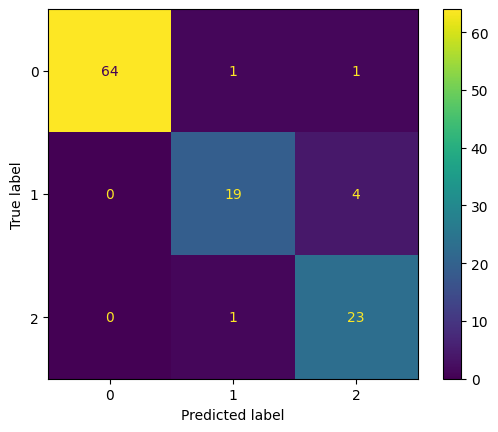

In [294]:
conf_matrix_plot(rf_cv,X_test,y_test)

In [295]:
def make_results(model_name, model_object):
    # Lấy các kết quả từ GridSearchCV
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Tìm dòng có giá trị F1 tốt nhất
    best_estimator_results = cv_results.loc[cv_results['mean_test_f1'].idxmax(), :]

    # Lấy các giá trị từ dòng có kết quả tốt nhất
    f1 = best_estimator_results['mean_test_f1']
    recall = best_estimator_results['mean_test_recall']
    precision = best_estimator_results['mean_test_precision']
    accuracy = best_estimator_results['mean_test_accuracy']

    # Tạo DataFrame để hiển thị kết quả
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]})

    return table


In [296]:
rf_cv_results = make_results('Random Forest CV', rf_cv)
print(rf_cv_results)

              Model        F1    Recall  Precision  Accuracy
0  Random Forest CV  0.899303  0.900435   0.902042  0.900435


## Feature Selection

<Axes: >

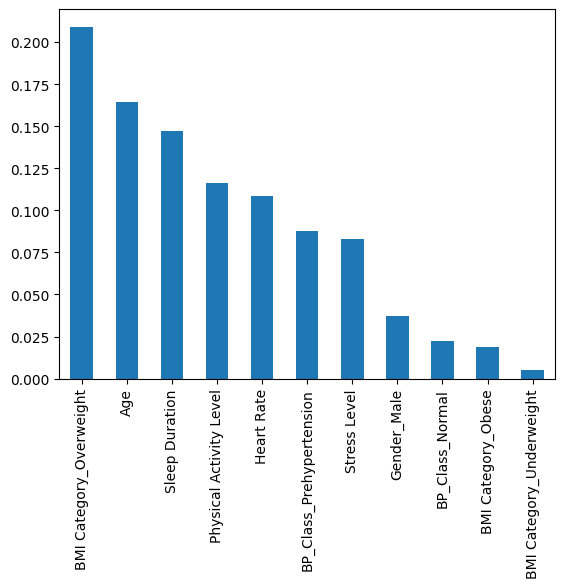

In [297]:
importances = rf_cv.best_estimator_.feature_importances_
forest_impotances = pd.Series(importances, index=X.columns).sort_values(ascending=False)


fig,ax = plt.subplots()
forest_impotances.plot.bar(ax=ax)

In [298]:
y = df['Sleep Disorder']

X = df.copy()
X = X.drop(['BMI Category_Underweight','BP_Class_Normal','Gender_Male','BMI Category_Obese'],axis=1)


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25,stratify= y, random_state = 42)

In [299]:
%%time 

rf = RandomForestClassifier(random_state=0)

cv_param = {
    'max_depth': [3,5],
    'min_samples_leaf': [1,3],
    'min_samples_split': [2,4],
    'max_features': [2, 4],
    'n_estimators': [75, 125]
}


scoring = {'accuracy': 'accuracy', 'precision': 'precision_weighted', 'recall': 'recall_weighted', 'f1': 'f1_weighted'}

rf_cv = GridSearchCV(rf, cv_param, scoring=scoring, cv=5, refit='f1', n_jobs=-1)
rf_cv.fit(X_train, y_train)

CPU times: total: 344 ms
Wall time: 2.66 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [3, 5], 'max_features': [2, 4],
                         'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 4],
                         'n_estimators': [75, 125]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1_weighted',
                      'precision': 'precision_weighted',
                      'recall': 'recall_weighted'})

In [300]:
rf_cv_results = make_results('Random Forest CV', rf_cv)
print(rf_cv_results)

              Model   F1  Recall  Precision  Accuracy
0  Random Forest CV  1.0     1.0        1.0       1.0


In [301]:
rf_cv.best_params_ 

{'max_depth': 3,
 'max_features': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 75}

Accuracy: 100.00%


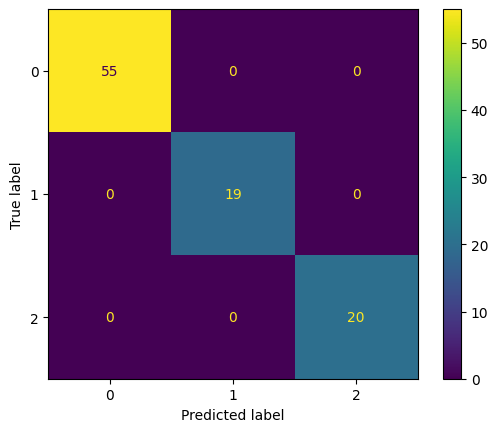

In [302]:
conf_matrix_plot(rf_cv,X_test,y_test)

In [303]:
pickle.dump(rf_cv, open("model.pickle",'wb'))

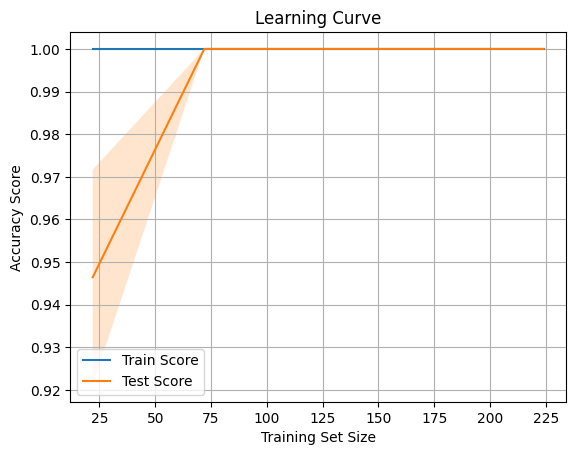

In [309]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='accuracy')

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, label='Train Score')
    plt.plot(train_sizes, test_mean, label='Test Score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Vẽ learning curves
plot_learning_curve(rf_cv, X_train, y_train)